### Linear Regression with the Normal equation and with Gradient Descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Reading in the data 

In [2]:
data = np.loadtxt(open("./linear_regression_test.csv", "rb"), delimiter=",")

In [3]:
X = data[:, 0]
y = data[:, 1]

Text(0.5, 1.0, 'Scatter plot of the data')

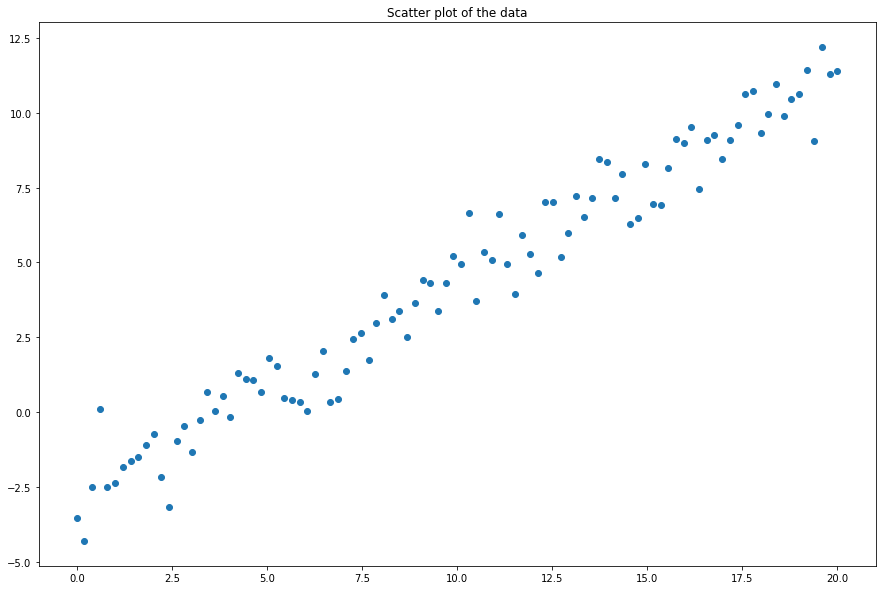

In [4]:
plt.figure(figsize=(15, 10))
plt.scatter(X, y)
plt.title('Scatter plot of the data')

In [5]:
# Adding a column of ones to X so that the multiplication will work out -- it accounts for the intercept, or bias
X_b = np.c_[np.ones((100, 1)), X]

In [6]:
# The normal equation
theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [7]:
theta

array([-2.83768284,  0.71319409])

In [8]:
# our prediction
y_pred = X_b.dot(theta)

In [9]:
# calculating R2, residual sum of squares divided by total sum of squares,
# or the amount of variance explained by our model over the total variance 

def r_squared(y, y_pred):
    t_S_S = np.sum(y - np.mean(y)**2)
    r_S_S = np.sum((y - y_pred) ** 2)
    R_2 = 1- r_S_S/t_S_S
    return R_2

In [12]:
R_2 = r_squared(y, y_pred)

Text(12.5, 0, 'R2 =  1.0525104840886557')

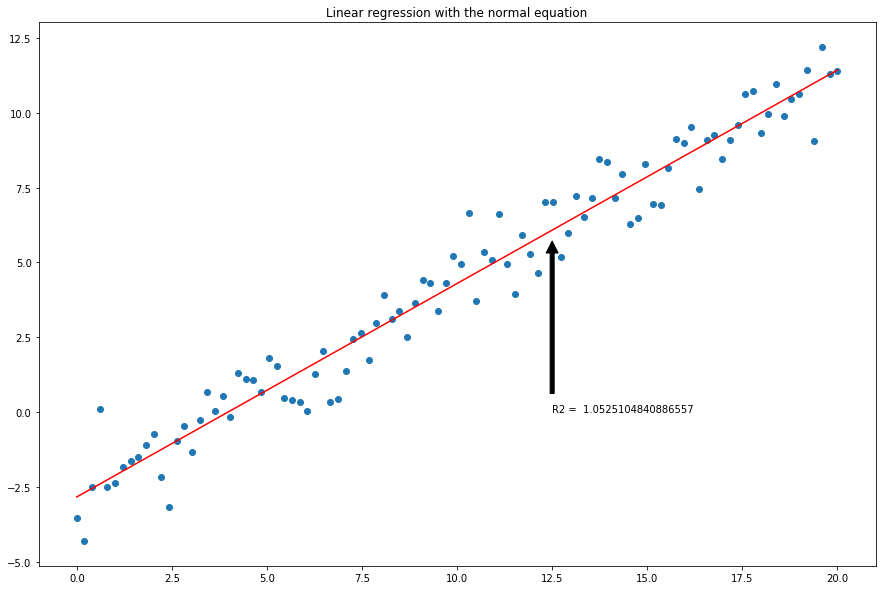

In [13]:
plt.figure(figsize=(15, 10))
plt.scatter(X, y)
plt.plot(X, y_pred, color = 'r')
plt.title('Linear regression with the normal equation')
ax= plt.gca()
ax.annotate(f'R2 =  {R_2}', xy=(12.5, 6), xytext=(12.5, 0),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

In [14]:
def gradient_descent(alpha, x, y, ep=0.0001, max_iter=10000):
    converged = False
 

    iter = 0
    m = x.shape[0] # number of samples

    # initial theta
    intercept = 0
    slope = 0
    # total error, J(theta)
    J = sum([(intercept + slope*x[i] - y[i])**2 for i in range(m)])

    # Iterate Loop
    while not converged:
        # for each training sample, compute the gradient (d/d_theta j(theta))
        grad0 = 1.0/m * sum([(intercept + slope*x[i] - y[i]) for i in range(m)]) 
        grad1 = 1.0/m * sum([(intercept + slope*x[i] - y[i])*x[i] for i in range(m)])

        # update the theta_temp
        temp_intercept = intercept - alpha * grad0
        temp_slope = slope - alpha * grad1
    
        # update theta
        intercept = temp_intercept
        slope = temp_slope

        # mean squared error
        e = sum( [ (intercept + slope*x[i] - y[i])**2 for i in range(m)] ) 

        if abs(J-e) <= ep:
            print ('Converged, iterations: ', iter, '!!!')
            converged = True
    
        J = e   # update error 
        iter += 1  # update iter
    
        if iter == max_iter:
            print ('Max interactions exceeded!')
            converged = True

    return intercept,slope

In [15]:
gradient = gradient_descent(0.001, X, y, max_iter=100000)

Converged, iterations:  13798 !!!


In [16]:
# getting our predictions with gradient descent
y_pred = X_b.dot(gradient)

In [17]:
# r_squared of gradient descent
R_2 = r_squared(y, y_pred)

Text(12.5, 0, 'R2 =  1.0526504297799297')

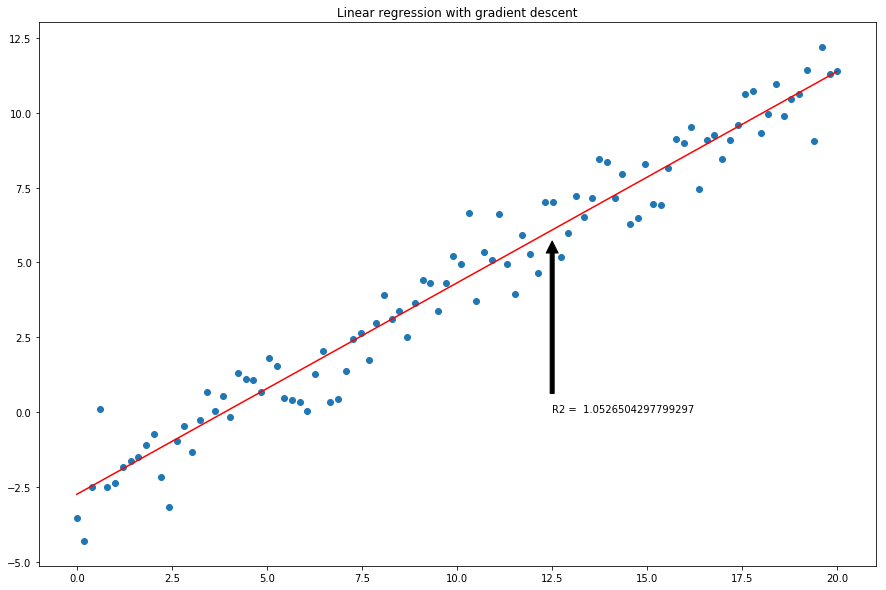

In [18]:
# plotting with gradient descent
plt.figure(figsize=(15, 10))
plt.scatter(X, y)
plt.plot(X, y_pred, color = 'r')
plt.title('Linear regression with gradient descent')
ax= plt.gca()
ax.annotate(f'R2 =  {R_2}', xy=(12.5, 6), xytext=(12.5, 0),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )